    Ben Christensen
    Math 402
    November 30, 2018

# Data Visualization

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("scores_data.csv")
df.head(n=10)

,Unnamed: 0,Name,Party,Position,Score,State,Tenure,YOB
0,0,"Abercrombie, Neil",D,Rep,-1.047578e+12,HI,7,1938
1,1,"Ackerman, Gary Leonard",D,Rep,-1.051433e+12,NY,8,1942
2,2,"Aderholt, Robert",R,Rep,-1.292394e+12,AL,11,1965
3,3,"Allen, Thomas H.",D,Rep,-1.053353e+12,ME,6,1945
4,4,"Andrews, Robert Ernest",D,Rep,-1.077127e+12,NJ,9,1957
5,5,"Archer, William Reynolds, Jr.",R,Rep,-2.460180e+11,TX,2,1928
6,6,"Armey, Richard Keith",R,Rep,-3.606664e+11,TX,3,1940
7,7,"Bachus, Spencer T., III",R,Rep,-1.202307e+12,AL,9,1947
8,8,"Baesler, Henry Scott (Scotty)",D,Rep,-2.283760e+11,KY,1,1941
9,9,"Baker, Richard Hugh",R,Rep,-1.155957e+12,LA,6,1948


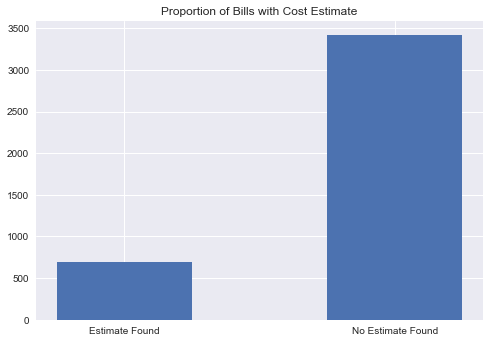

In [3]:
num_bills = 4112
num_nonzero = 694
plt.bar(["Estimate Found","No Estimate Found"], [num_nonzero,num_bills - num_nonzero], .5)
plt.title("Proportion of Bills with Cost Estimate")
plt.show()

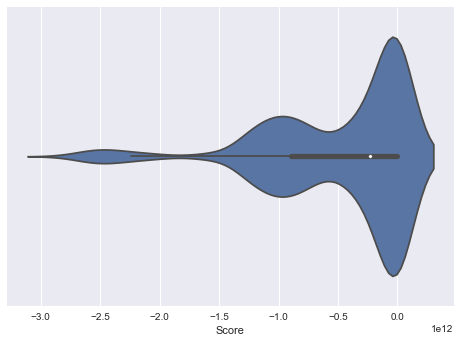

In [4]:
sns.violinplot(x=df["Score"])
plt.show()

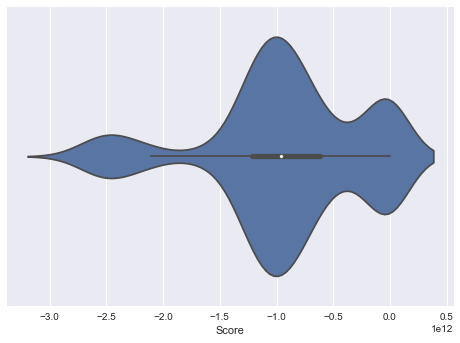

In [5]:
sns.violinplot(x=df[df["Tenure"]>4]["Score"])
plt.show()

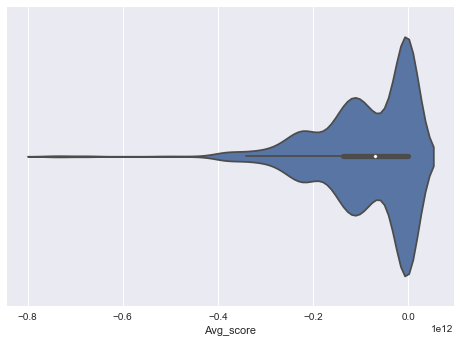

In [6]:
df["Avg_score"] = df["Score"] / df["Tenure"]
sns.violinplot(x=df["Avg_score"])
plt.show()

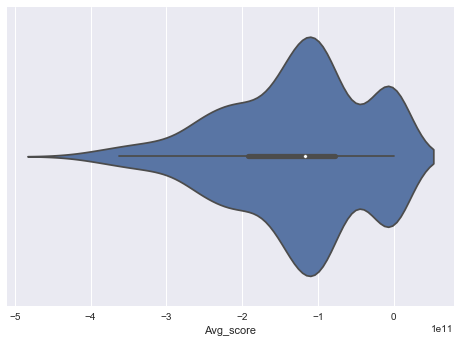

In [7]:
df["Avg_score"] = df["Score"] / df["Tenure"]
sns.violinplot(x=df[df["Tenure"]>4]["Avg_score"])
plt.show()

In [8]:
regions_df = pd.read_csv("regions.csv")
regions_df.head(n=10)

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [9]:
df = df.merge(regions_df[["State Code", "Region", "Division"]], left_on="State", right_on="State Code")

In [10]:
df.to_csv("scores_w_regions")

In [17]:
df.head()

,Unnamed: 0,Name,Party,Position,Score,State,Tenure,YOB,Avg_score,State Code,Region,Division
0,0,"Abercrombie, Neil",D,Rep,-1.047578e+12,HI,7,1938,-1.496541e+11,HI,West,Pacific
1,280,"Mink, Patsy Takemoto",D,Rep,-3.926870e+11,HI,3,1927,-1.308957e+11,HI,West,Pacific
2,499,"Case, Ed",D,Rep,-6.337500e+11,HI,3,1952,-2.112500e+11,HI,West,Pacific
3,673,"Hirono, Mazie",D,Rep,-4.689300e+10,HI,3,1947,-1.563100e+10,HI,West,Pacific
4,721,"Djou, Charles",R,Rep,-3.000000e+07,HI,1,1970,-3.000000e+07,HI,West,Pacific


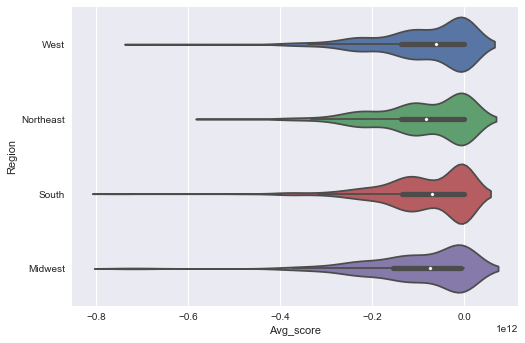

In [18]:
sns.violinplot(x="Avg_score", y="Region", data=df, orient='h')
plt.show()

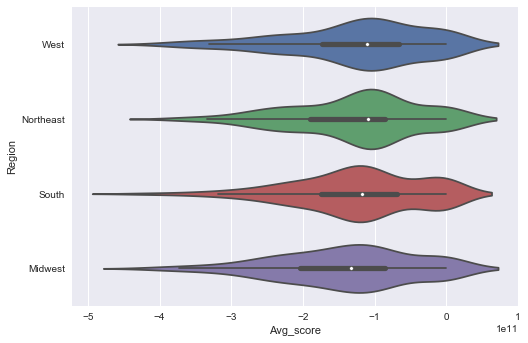

In [19]:
sns.violinplot(x="Avg_score", y="Region", data=df[df["Tenure"]>4], orient='h')
plt.show()

In [38]:
regions = np.array(list(set(df["Region"])))
means = np.array([df[df["Region"] == region]["Score"].mean() for region in regions])

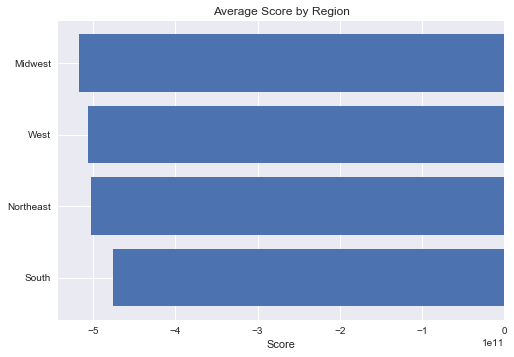

In [39]:
mask = means.argsort()
positions = np.arange(len(regions))
plt.barh(positions, means[mask][::-1], align="center")
plt.yticks(positions, regions[mask][::-1])
plt.xlabel("Score")
plt.title("Average Score by Region")
plt.show()



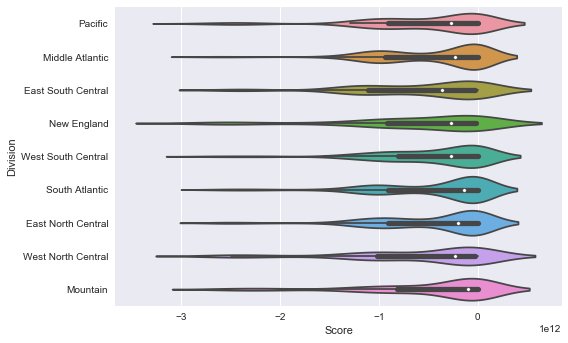

In [12]:
sns.violinplot(x="Score", y="Division", data=df, orient='h')
plt.show()

In [34]:
divisions = np.array(list(set(df["Division"])))
means = np.array([df[df["Division"] == division]["Score"].mean() for division in divisions])

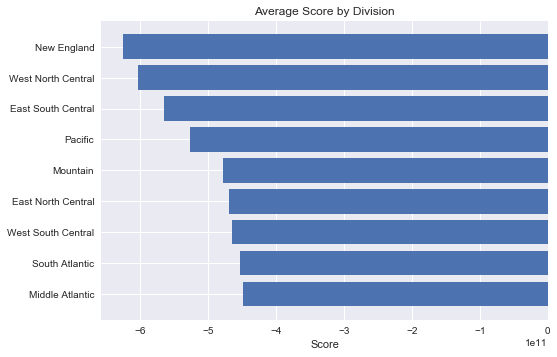

In [35]:
mask = means.argsort()
positions = np.arange(len(divisions))
plt.barh(positions, means[mask][::-1], align="center")
plt.yticks(positions, divisions[mask][::-1])
plt.xlabel("Score")
plt.title("Average Score by Division")
plt.show()


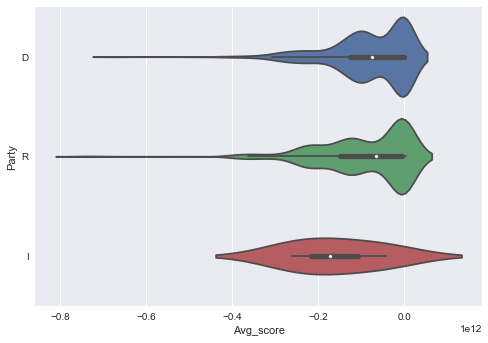

In [15]:
sns.violinplot(x="Avg_score", y="Party", data=df, orient='h')
plt.show()

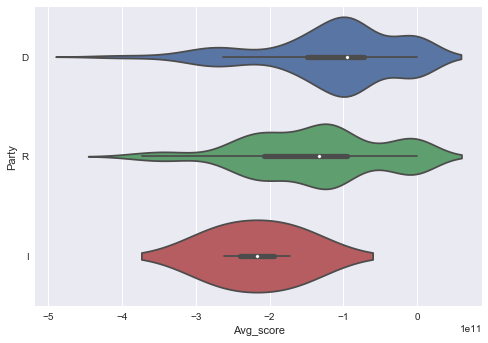

In [7]:
sns.violinplot(x="Avg_score", y="Party", data=df[df["Tenure"]>4], orient='h')
plt.show()

In [8]:
parties = np.array(list(set(df["Party"])))
means = np.array([df[(df["Party"] == party) & (df["Tenure"]>4)]["Score"].mean() for party in parties])
mask = means.argsort()

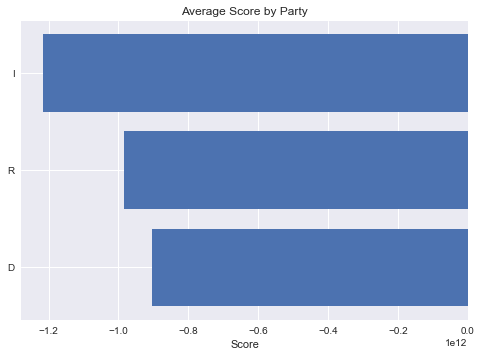

In [9]:
positions = np.arange(len(parties))
plt.barh(positions, means[mask][::-1], align="center")
plt.yticks(positions, parties[mask][::-1])
plt.xlabel("Score")
plt.title("Average Score by Party")
plt.show()

In [18]:
tenures = np.array(list(set(df["Tenure"])))
means = np.array([df[df["Tenure"] == tenure]["Avg_score"].mean() for tenure in tenures])

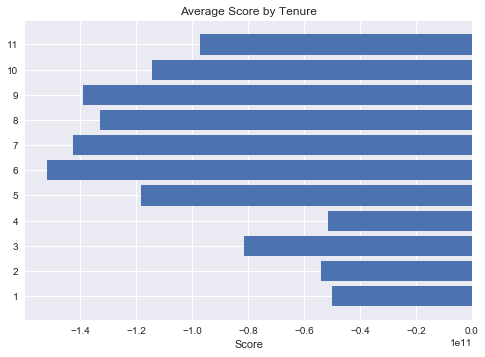

In [19]:
positions = np.arange(len(tenures))
plt.barh(positions, means, align="center")
plt.yticks(positions, tenures)
plt.xlabel("Score")
plt.title("Average Score by Tenure")
plt.show()

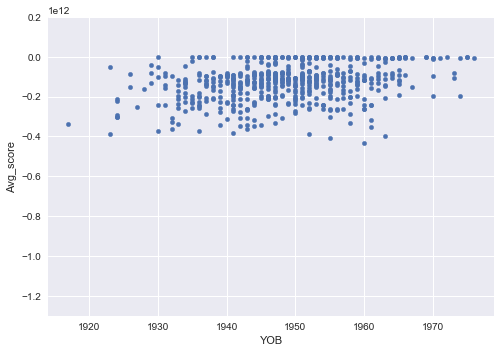

In [10]:
df[df["Tenure"]>4].plot(kind="scatter", x="YOB", y="Avg_score")
plt.ylim(-1.3e12, .2e12)
plt.show()

In [21]:
tenures = np.array(list(set(df["Tenure"])))
means = np.array([df[df["Tenure"] == tenure]["Avg_score"].mean() for tenure in tenures])

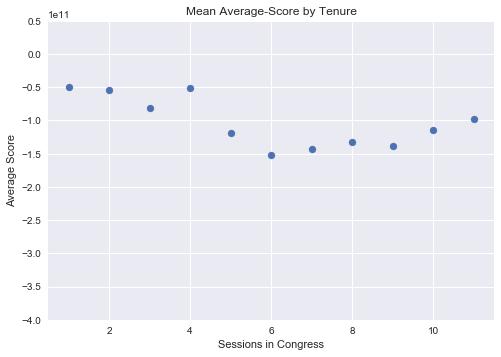

In [22]:
plt.scatter(tenures, means)
plt.title("Mean Average-Score by Tenure")
plt.ylim(-4e11, .5e11)
plt.ylabel("Average Score")
plt.xlabel("Sessions in Congress")
plt.show()

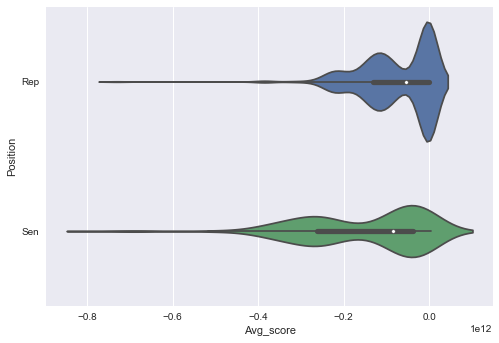

In [23]:
sns.violinplot(x="Avg_score", y="Position", data=df, orient='h')
plt.show()

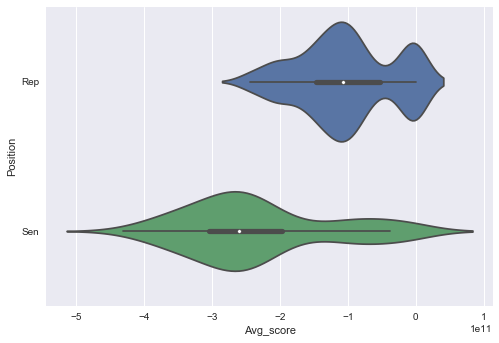

In [6]:
sns.violinplot(x="Avg_score", y="Position", data=df[df["Tenure"]>4], orient='h')
plt.show()

In [50]:
df.nlargest(10, "Score")

,Unnamed: 0,Name,Party,Position,Score,State,Tenure,YOB,Avg_score,State Code,Region,Division
151,1280,"Chiesa, Jeffrey Scott",R,Sen,3.700000e+09,NJ,1,1965,3.700000e+09,NJ,Northeast,Middle Atlantic
7,1011,"Takai, Mark",D,Rep,3.110000e+08,HI,1,1967,3.110000e+08,HI,West,Pacific
74,911,"Jeffries, Hakeem",D,Rep,3.110000e+08,NY,3,1970,1.036667e+08,NY,Northeast,Middle Atlantic
79,1007,"Rice, Kathleen Maura",D,Rep,3.110000e+08,NY,2,1965,1.555000e+08,NY,Northeast,Middle Atlantic
140,845,"Payne, Donald, Jr.",D,Rep,3.110000e+08,NJ,4,1958,7.775000e+07,NJ,Northeast,Middle Atlantic
142,930,"Norcross, Donald",D,Rep,3.110000e+08,NJ,3,1958,1.036667e+08,NJ,Northeast,Middle Atlantic
399,935,"Pocan, Mark",D,Rep,3.110000e+08,WI,3,1964,1.036667e+08,WI,Midwest,East North Central
413,960,"Ashford, John Bradley",D,Rep,3.110000e+08,NE,1,1949,3.110000e+08,NE,Midwest,West North Central
479,962,"Beyer, Donald Sternoff Jr.",D,Rep,3.110000e+08,VA,2,1950,1.555000e+08,VA,South,South Atlantic
572,780,"Bass, Karen",D,Rep,3.110000e+08,CA,4,1953,7.775000e+07,CA,West,Pacific


In [44]:
df.nsmallest(10, "Score")

,Unnamed: 0,Name,Party,Position,Score,State,Tenure,YOB,Avg_score,State Code,Region,Division
602,1123,"Feinstein, Dianne",D,Sen,-2.813974e+12,CA,11,1933,-2.558158e+11,CA,West,Pacific
118,1108,"Collins, Susan Margaret",R,Sen,-2.813154e+12,ME,11,1952,-2.557412e+11,ME,Northeast,New England
264,1150,"Landrieu, Mary L.",D,Sen,-2.719972e+12,LA,9,1955,-3.022191e+11,LA,South,West South Central
89,1196,"Schumer, Charles Ellis (Chuck)",D,Sen,-2.707430e+12,NY,10,1950,-2.707430e+11,NY,Northeast,Middle Atlantic
1296,1143,"Johnson, Timothy Peter (Tim)",D,Sen,-2.675038e+12,SD,9,1946,-2.972264e+11,SD,Midwest,West North Central
119,1178,"Snowe, Olympia Jean",R,Sen,-2.669601e+12,ME,8,1947,-3.337001e+11,ME,Northeast,New England
908,1131,"Grassley, Charles Ernest",R,Sen,-2.613560e+12,IA,11,1933,-2.375964e+11,IA,Midwest,West North Central
895,1179,"Specter, Arlen",R,Sen,-2.607952e+12,PA,7,1930,-3.725646e+11,PA,Northeast,Middle Atlantic
963,1156,"Lugar, Richard Green",R,Sen,-2.602788e+12,IN,8,1932,-3.253484e+11,IN,Midwest,East North Central
1229,1170,"Rockefeller, John Davison IV (Jay)",D,Sen,-2.602186e+12,WV,9,1937,-2.891317e+11,WV,South,South Atlantic


In [45]:
df.nlargest(10, "Avg_score")

,Unnamed: 0,Name,Party,Position,Score,State,Tenure,YOB,Avg_score,State Code,Region,Division
151,1280,"Chiesa, Jeffrey Scott",R,Sen,3.700000e+09,NJ,1,1965,3.700000e+09,NJ,Northeast,Middle Atlantic
7,1011,"Takai, Mark",D,Rep,3.110000e+08,HI,1,1967,3.110000e+08,HI,West,Pacific
413,960,"Ashford, John Bradley",D,Rep,3.110000e+08,NE,1,1949,3.110000e+08,NE,Midwest,West North Central
682,980,"Graham, Gwendolyn (Gwen)",D,Rep,3.110000e+08,FL,1,1963,3.110000e+08,FL,South,South Atlantic
1142,983,"Hardy, Cresent Leo",R,Rep,3.110000e+08,NV,1,1957,3.110000e+08,NV,West,Mountain
79,1007,"Rice, Kathleen Maura",D,Rep,3.110000e+08,NY,2,1965,1.555000e+08,NY,Northeast,Middle Atlantic
479,962,"Beyer, Donald Sternoff Jr.",D,Rep,3.110000e+08,VA,2,1950,1.555000e+08,VA,South,South Atlantic
674,889,"Clawson, Curt",R,Rep,3.110000e+08,FL,2,1959,1.555000e+08,FL,South,South Atlantic
678,912,"Jolly, David W.",R,Rep,3.110000e+08,FL,2,1972,1.555000e+08,FL,South,South Atlantic
740,899,"Duckworth, Tammy",D,Rep,3.110000e+08,IL,2,1968,1.555000e+08,IL,Midwest,East North Central


In [48]:
df.nsmallest(10, "Avg_score")

,Unnamed: 0,Name,Party,Position,Score,State,Tenure,YOB,Avg_score,State Code,Region,Division
696,1224,"Martinez, Melquiades R. (Mel)",R,Sen,-2.253081e+12,FL,3,1946,-7.510270e+11,FL,South,South Atlantic
949,641,"Sodrel, Michael E.",R,Rep,-7.304170e+11,IN,1,1945,-7.304170e+11,IN,Midwest,East North Central
323,638,"Schwarz, John J. H. (Joe)",R,Rep,-7.301360e+11,MI,1,1937,-7.301360e+11,MI,Midwest,East North Central
1173,1215,"Coleman, Norm",R,Sen,-2.033126e+12,MN,3,1949,-6.777087e+11,MN,Midwest,West North Central
1066,1226,"Salazar, Kenneth Lee",D,Sen,-2.016690e+12,CO,3,1955,-6.722300e+11,CO,West,Mountain
451,1219,"Sununu, John E.",R,Sen,-1.552891e+12,NH,3,1964,-5.176303e+11,NH,Northeast,New England
487,1239,"Webb, James H. (Jim)",D,Sen,-1.444772e+12,VA,3,1946,-4.815907e+11,VA,South,South Atlantic
618,1194,"Lincoln, Blanche Lambert",D,Sen,-2.585820e+12,AR,6,1960,-4.309701e+11,AR,South,West South Central
964,1188,"Bayh, Evan",D,Sen,-2.438044e+12,IN,6,1955,-4.063407e+11,IN,Midwest,East North Central
619,1218,"Pryor, Mark",D,Sen,-2.385257e+12,AR,6,1963,-3.975428e+11,AR,South,West South Central


In [55]:
print(100*(1 - len(df[df["Score"]>0]) / len(df)), "% have negative scores.", sep='')

90.42145593869732% have negative scores.
